In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#import csv file to dataframe
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

### 1.identify missing values

In [4]:
#check null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### 2.identify duplicate values

In [5]:
df.duplicated().sum()

0

In [7]:
df1 = df.drop(['date'],axis = 1)
df1

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [8]:
df1.shape

(1461, 5)

### 3. identify outliers

<AxesSubplot:>

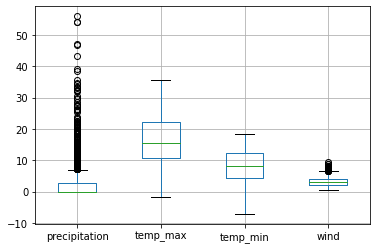

In [9]:
df1.iloc[:,:].boxplot() # see the out lyers using boxplot


In [10]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
Q1

precipitation     0.0
temp_max         10.6
temp_min          4.4
wind              2.2
Name: 0.25, dtype: float64

In [11]:
IQR = Q3-Q1

In [12]:
# get the outlier row index as true
Out_row = ((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)
Out_row

<ipython-input-12-53b9030ee849>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Out_row = ((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)
<ipython-input-12-53b9030ee849>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Out_row = ((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)


0       False
1        True
2       False
3        True
4       False
        ...  
1456     True
1457    False
1458    False
1459    False
1460    False
Length: 1461, dtype: bool

In [13]:
#set the correct rows as a ture and get these rows
df2 = df1[~Out_row] 
df2

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


<AxesSubplot:>

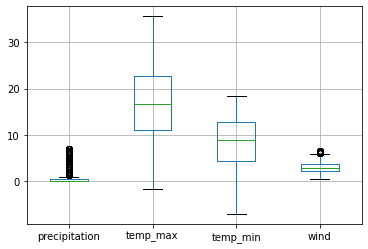

In [14]:
df2.iloc[:,:].boxplot()

In [15]:
df2.shape

(1233, 5)

In [16]:
x = df2.drop(['weather'],axis = 1)
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
2,0.8,11.7,7.2,2.3
4,1.3,8.9,2.8,6.1
5,2.5,4.4,2.2,2.2
6,0.0,7.2,2.8,2.3
...,...,...,...,...
1455,0.0,4.4,0.0,2.5
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [17]:
y = df2['weather']
y

0       drizzle
2          rain
4          rain
5          rain
6          rain
         ...   
1455        sun
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1233, dtype: object

### 4. check data imbalance

In [18]:
y.value_counts()

sun        635
rain       431
fog        101
drizzle     53
snow        13
Name: weather, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(x, y)

In [21]:
y_sm.value_counts()

drizzle    635
sun        635
fog        635
snow       635
rain       635
Name: weather, dtype: int64

### 6.parameter tuning

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 10)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params ={'n_estimators':[50,100,150,200,250],'criterion':['gini','entropy']}
Tmodel = RandomForestClassifier()

In [26]:
gsearch = GridSearchCV(Tmodel,params,cv=folds) #parameter tuning
result = gsearch.fit(x_sm,y_sm)
print(result.best_params_)
print(result.best_score_)

{'criterion': 'entropy', 'n_estimators': 250}
0.8743775172112771


In [26]:
paramL = {'C': [1,5,10,15,25,30]}
T2model = LogisticRegression(solver='liblinear',multi_class='auto')

In [27]:
gsearch2 = GridSearchCV(T2model,paramL,cv=folds) #parameter tuning
result2 = gsearch2.fit(x_sm,y_sm)
print(result2.best_params_)
print(result2.best_score_)

{'C': 25}
0.5994028133246037


### check best model by cross validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
(cross_val_score(GaussianNB(),x_sm,y_sm)).mean()

0.6359055118110236

In [30]:
(cross_val_score(LogisticRegression(solver='liblinear',multi_class='auto',C=25),x_sm,y_sm)).mean()


0.6006299212598425

In [31]:
(cross_val_score(SVC(),x_sm,y_sm)).mean()


0.6116535433070867

In [32]:
(cross_val_score(RandomForestClassifier(n_estimators=250,criterion='entropy'),x_sm,y_sm)).mean()


0.8604724409448818

####                                                Best model is RandomForestClassifier

In [33]:
#split data into train & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_sm,y_sm,test_size = 0.3)

In [34]:
model = RandomForestClassifier(n_estimators=150,criterion='entropy')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8824763903462749

In [35]:
y_predicted = model.predict(x_test)
y_predicted 

array(['sun', 'drizzle', 'fog', 'drizzle', 'snow', 'drizzle', 'snow',
       'rain', 'rain', 'drizzle', 'snow', 'snow', 'sun', 'snow', 'sun',
       'drizzle', 'drizzle', 'drizzle', 'drizzle', 'rain', 'drizzle',
       'snow', 'snow', 'fog', 'drizzle', 'drizzle', 'rain', 'rain', 'fog',
       'sun', 'rain', 'drizzle', 'fog', 'drizzle', 'snow', 'rain', 'sun',
       'rain', 'snow', 'fog', 'snow', 'sun', 'snow', 'fog', 'drizzle',
       'snow', 'sun', 'drizzle', 'sun', 'drizzle', 'drizzle', 'snow',
       'fog', 'snow', 'snow', 'fog', 'sun', 'rain', 'drizzle', 'sun',
       'snow', 'sun', 'sun', 'fog', 'fog', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'snow', 'sun', 'rain', 'rain', 'rain', 'fog',
       'rain', 'snow', 'drizzle', 'drizzle', 'snow', 'rain', 'snow',
       'sun', 'sun', 'rain', 'rain', 'drizzle', 'drizzle', 'fog', 'sun',
       'rain', 'drizzle', 'fog', 'fog', 'sun', 'snow', 'sun', 'sun',
       'sun', 'rain', 'drizzle', 'fog', 'sun', 'sun', 'snow', 'snow',
      

In [36]:
model.predict([[0.8,11.7,7.2,2.3]])

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rain'], dtype=object)

### function to predict weather

In [37]:
def predict_weather(precipitation,temp_max,temp_min,wind):    
  

    x = np.zeros(len(x_sm.columns))
    x[0] = precipitation
    x[1] = temp_max
    x[2] = temp_min
    x[3] = wind

    return model.predict([x])[0]

In [38]:
predict_weather(0.8,11.7,7.2,2.3)

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'rain'

In [39]:
predict_weather(0.0,7.2,0.6,2.6)

G:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'fog'

### Confusion matrix

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [41]:
cm = metrics.confusion_matrix(y_test,y_predicted)
cm

array([[168,   8,   0,   0,  14],
       [ 18, 145,   0,   0,  25],
       [  2,   4, 175,   0,  11],
       [  0,   0,   0, 208,   0],
       [ 14,  14,   2,   0, 145]], dtype=int64)

### Heatmap

Text(0.5, 1.0, 'Accuracy score:0.8824763903462749')

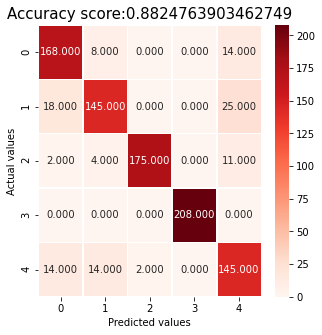

In [42]:
score = model.score(x_test,y_test)
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidth = .5, cmap = 'Reds')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
topic = 'Accuracy score:{0}'.format(score)
plt.title(topic,size = 15)

### Classification Report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

     drizzle       0.83      0.88      0.86       190
         fog       0.85      0.77      0.81       188
        rain       0.99      0.91      0.95       192
        snow       1.00      1.00      1.00       208
         sun       0.74      0.83      0.78       175

    accuracy                           0.88       953
   macro avg       0.88      0.88      0.88       953
weighted avg       0.89      0.88      0.88       953



### Other Measurements

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,mean_squared_error

In [46]:
#accuracy
accuracy_score(y_test,y_predicted) 
#recall means sensitivity

0.8824763903462749

In [47]:
#error rate
1-accuracy_score(y_test,y_predicted)

0.1175236096537251

### Export the tested model to a pickle file

In [52]:
import pickle
with open('weather_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)
    
#wb used to insert binary data

In [51]:
import pickle
with open('weather_prediction_model.pickle','rb') as f:
    data = pickle.load(f)
    

### Export column information to a file that will be useful later on in our prediction application

In [49]:
#show column details
import json
columns = {
    'data_columns' : [col.lower() for col in x_sm.columns]
}
with open("columns_weather.json","w") as f:
    f.write(json.dumps(columns))